# Experiments with Neural Networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**Following is the input for our Neural Network**

In [2]:
X = np.array(([1], [2], [3], [4], [5], [6], [7]), dtype=float)
y = np.array(([1.0], [3.0], [3.0], [4.0], [2.0], [1.0], [4.0]), dtype=float)

In [3]:
class Neural_Network():
    
    def __init__(self):        
        self.ip_layer_size = 1                                                # Defining parameters
        self.op_layer_size = 1
        self.hidden_layer_size = 40
        
        self.W1 = np.random.randn(self.ip_layer_size , self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size , self.op_layer_size)
        self.b1 = np.zeros((1 , self.hidden_layer_size))
        self.b2 = np.zeros((1 , self.op_layer_size))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) + self.b1
        self.a2 = np.tanh(self.z2)                                         # Feed Forward 
        self.z3 = np.dot(self.a2, self.W2) + self.b2
        yHat = self.z3 
        return yHat
        
    def costFunction(self, X, y):
        self.yHat = self.forward(X)                                        # y-self is the target value
        J = 0.5*sum((y-self.yHat)**2)                                      # yHat is the output value of the neural network 
        return J
    
    def tanh_derivative(self, z): 
                                                                   #Compute derivative of tanh
        return (1 - np.power(np.tanh(z), 2))    
    
    def costFunctionPrime(self, X, y):
                                                         # Computing derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = -(y-self.yHat)
        dJdW2 = np.dot(self.a2.T, delta3)
        dJdb2 = np.sum(delta3, axis=0)
        delta2 = np.multiply(np.dot(delta3, self.W2.T), self.tanh_derivative(self.z2))
        dJdW1 = np.dot(X.T, delta2) 
        dJdb1 = np.sum(delta2, axis=0)
        
        return dJdW1, dJdW2, dJdb1, dJdb2
    
    def train(self, learning_rate):
                                                               # Training the neural network with desired learning rate
        cost = []
        for i in range(60000):                                  #  Here , 60000 is the number of epochs
            dJdW1, dJdW2, dJdb1, dJdb2 = self.costFunctionPrime(X,y)
            self.W1 = self.W1 - learning_rate*dJdW1
            self.W2 = self.W2 - learning_rate*dJdW2             # Updating the new weights and biases after back-propagation
            self.b1 = self.b1 - learning_rate*dJdb1
            self.b2 = self.b2 - learning_rate*dJdb2
            cost.append(self.costFunction(X,y))
        return cost

### Now Training it for different learning rates and observe the cost function and the rate of decrease of it. 

### Also , take note of the errors when model trained at each learning rate.

In [9]:
LR = [0.0015 , 0.002 , 0.0025 , 0.003 , 0.0035]
cost = []
errors = []

for i in LR:
    NN = Neural_Network()
    cost1 = NN.costFunction(X,y)          
    cost.append(NN.train(i))                             
    print("For Learning Rate as" , str(i))
    print("original output = ", y.T)
    print("Predicted output = ", NN.forward(X).T[:])
    print("error = ", NN.costFunction(X,y))
    print("----------------------------------------------------------------")
    errors.append(NN.costFunction(X,y))

For Learning Rate as 0.0015
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 0.99909795  2.99444722  3.00036733  3.98980205  1.99097047  0.98787082
   3.98123911]]
error =  [ 0.0003582]
----------------------------------------------------------------
For Learning Rate as 0.002
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.00165231  3.00251476  3.00496425  4.00442961  2.00950814  1.00907206
   4.01191055]]
error =  [ 0.00018394]
----------------------------------------------------------------
For Learning Rate as 0.0025
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.0027703   3.00324203  3.0067765   4.00535828  2.01030764  1.00977295
   4.01088434]]
error =  [ 0.00020652]
----------------------------------------------------------------
For Learning Rate as 0.003
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.00052019  3.00085228  3.0013436   4.00158858  2.00234111  1.00171755

### Plotting change in costs for different learning rates 

### Notice , how soon the the cost tends to zero when using different number of epochs and also using different learning rates as shown.

### Notice , as the learning rate increases the number of epochs to converge also decreases but again up to a limit. 

### Also for a given number of epochs the cost function is minimized for a higher learning rate which is evident from the graph. 

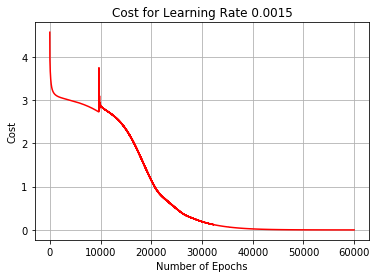

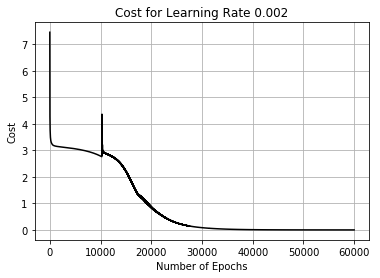

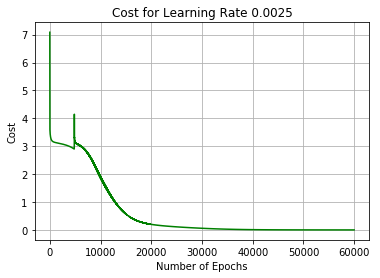

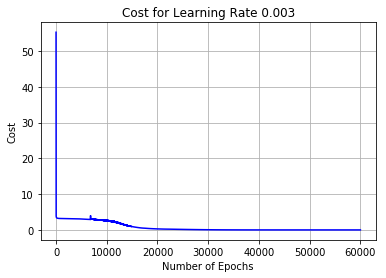

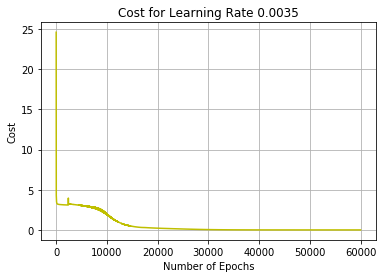

In [10]:
plt.subplot()
plt.title('Cost for Learning Rate 0.0015')
plt.plot(cost[0] , 'r' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.002')
plt.plot(cost[1] , 'k' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.0025')
plt.plot(cost[2] , 'g' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.003')
plt.plot(cost[3] , 'b' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.0035')
plt.plot(cost[4] , 'y' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

### Plotting change in errors with respect to learning rate.

### Notice , how the error decreased with increase in learning rate.

### But soon after achieving a particular learning rate , the error will increase as shown in the graph below. 

### The increase in the graph or the error wrt learning rate after minima around 0.0030 is due to overfitting which must be prevented so as not to lower the model performance.

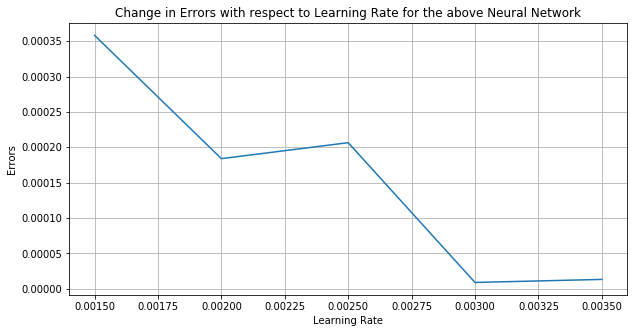

In [12]:
plt.figure(figsize=(10,5))
plt.plot(LR , errors)
plt.title('Change in Errors with respect to Learning Rate for the above Neural Network')
plt.xlabel("Learning Rate")
plt.ylabel("Errors")
plt.grid()
plt.show()

# The model below is same except the number of hidden layer size is halved to 20.

## Now , observe the change in cost with change in learning rates and epochs.

In [13]:
class Neural_Network():
    
    def __init__(self):        
        self.ip_layer_size = 1                                                # Defining parameters
        self.op_layer_size = 1
        self.hidden_layer_size = 20
        
        self.W1 = np.random.randn(self.ip_layer_size , self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size , self.op_layer_size)
        self.b1 = np.zeros((1 , self.hidden_layer_size))
        self.b2 = np.zeros((1 , self.op_layer_size))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) + self.b1
        self.a2 = np.tanh(self.z2)                                         # Feed Forward 
        self.z3 = np.dot(self.a2, self.W2) + self.b2
        yHat = self.z3 
        return yHat
        
    def costFunction(self, X, y):
        self.yHat = self.forward(X)                                        # y-self is the target value
        J = 0.5*sum((y-self.yHat)**2)                                      # yHat is the output value of the neural network 
        return J
    
    def tanh_derivative(self, z): 
                                                                   #Compute derivative of tanh
        return (1 - np.power(np.tanh(z), 2))    
    
    def costFunctionPrime(self, X, y):
                                                         # Computing derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = -(y-self.yHat)
        dJdW2 = np.dot(self.a2.T, delta3)
        dJdb2 = np.sum(delta3, axis=0)
        delta2 = np.multiply(np.dot(delta3, self.W2.T), self.tanh_derivative(self.z2))
        dJdW1 = np.dot(X.T, delta2) 
        dJdb1 = np.sum(delta2, axis=0)
        
        return dJdW1, dJdW2, dJdb1, dJdb2
    
    def train(self, learning_rate):
                                                               # Training the neural network with desired learning rate
        cost = []
        for i in range(60000):                                  #  Here , 60000 is the number of epochs
            dJdW1, dJdW2, dJdb1, dJdb2 = self.costFunctionPrime(X,y)
            self.W1 = self.W1 - learning_rate*dJdW1
            self.W2 = self.W2 - learning_rate*dJdW2             # Updating the new weights and biases after back-propagation
            self.b1 = self.b1 - learning_rate*dJdb1
            self.b2 = self.b2 - learning_rate*dJdb2
            cost.append(self.costFunction(X,y))
        return cost

In [14]:
LR = [0.0015 , 0.002 , 0.0025 , 0.003 , 0.0035]
cost = []
errors = []

for i in LR:
    NN = Neural_Network()
    cost1 = NN.costFunction(X,y)          
    cost.append(NN.train(i))                             
    print("For Learning Rate as" , str(i))
    print("original output = ", y.T)
    print("Predicted output = ", NN.forward(X).T[:])
    print("error = ", NN.costFunction(X,y))
    print("----------------------------------------------------------------")
    errors.append(NN.costFunction(X,y))

For Learning Rate as 0.0015
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.03099189  2.83143352  3.3039712   3.80368283  2.03229099  0.99664387
   4.00132471]]
error =  [ 0.0806849]
----------------------------------------------------------------
For Learning Rate as 0.002
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.0001785   2.99667639  3.00360318  3.99477114  1.99508029  0.99486297
   3.99338329]]
error =  [  7.28878060e-05]
----------------------------------------------------------------
For Learning Rate as 0.0025
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 0.99998912  2.99991579  2.99997139  3.99981485  1.99981423  0.99973055
   3.99955432]]
error =  [  1.74024838e-07]
----------------------------------------------------------------
For Learning Rate as 0.003
original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 1.00011299  3.00003195  3.00045577  4.00033201  2.00091499  

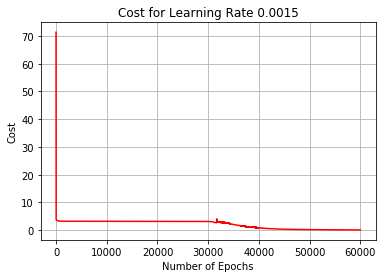

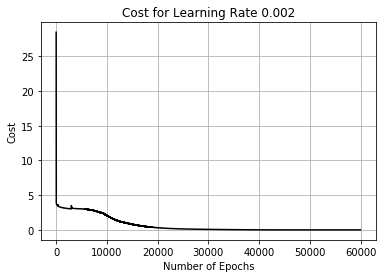

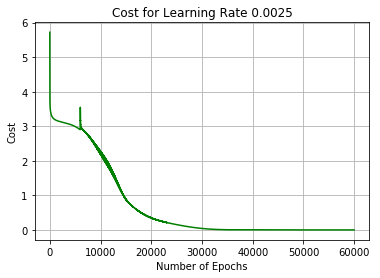

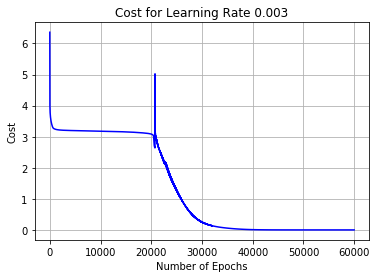

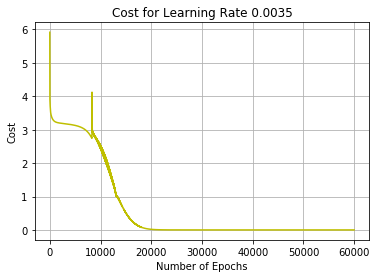

In [15]:
plt.subplot()
plt.title('Cost for Learning Rate 0.0015')
plt.plot(cost[0] , 'r' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.002')
plt.plot(cost[1] , 'k' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.0025')
plt.plot(cost[2] , 'g' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.003')
plt.plot(cost[3] , 'b' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.subplot()
plt.title('Cost for Learning Rate 0.0035')
plt.plot(cost[4] , 'y' )
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()

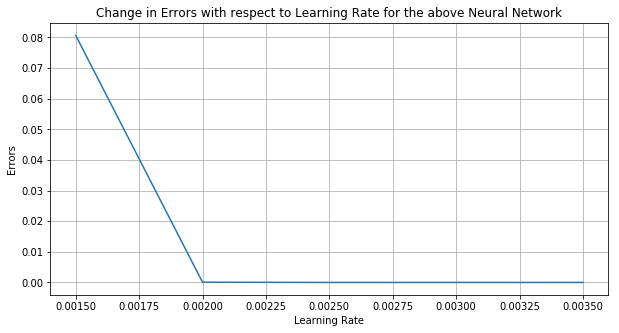

In [16]:
plt.figure(figsize=(10,5))
plt.plot(LR , errors)
plt.title('Change in Errors with respect to Learning Rate for the above Neural Network')
plt.xlabel("Learning Rate")
plt.ylabel("Errors")
plt.grid()
plt.show()